In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18
import h5py
import seaborn as sns
import pandas as pd

# Verify with Full Population

In [2]:
lenp = 10
Nobs_plot = np.zeros(lenp)

with h5py.File("mock_data.h5",'r') as hf:
    for i in range(lenp):
        Nobs_plot[i] = np.array(hf['Ndet'+str(i)])
hf.close()

In [3]:
h = []
Om = []

with h5py.File("inference_full_result.h5",'r') as hf:
    for i in range(lenp):
        h.append(np.array(hf['h'+str(i)]))
        Om.append(np.array(hf['Om'+str(i)]))
hf.close()

h = np.array(h)
Om = np.array(Om)

Text(0, 0.5, 'h')

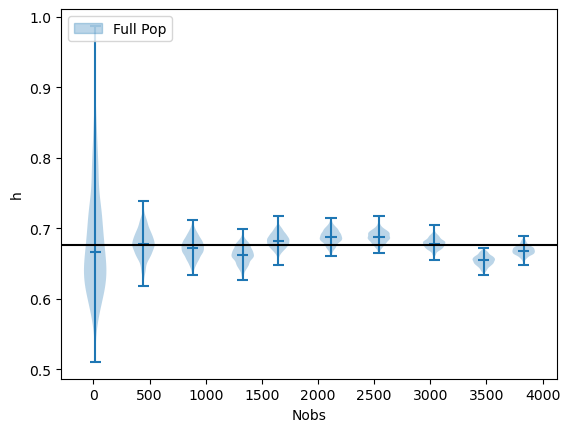

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))


positions = np.arange(3,13,3)
data = np.random.randn(1000, len(positions))
add_label(plt.violinplot(dataset=h.T, positions=Nobs_plot, showmeans=False, showmedians=True,
               widths=200.0), "Full Pop")  


plt.axhline(Planck18.h, color='k', label='Planck18')

plt.legend(*zip(*labels), loc=2)
plt.xlabel('Nobs')
plt.ylabel('h')

Text(0, 0.5, '$\\Omega_M$')

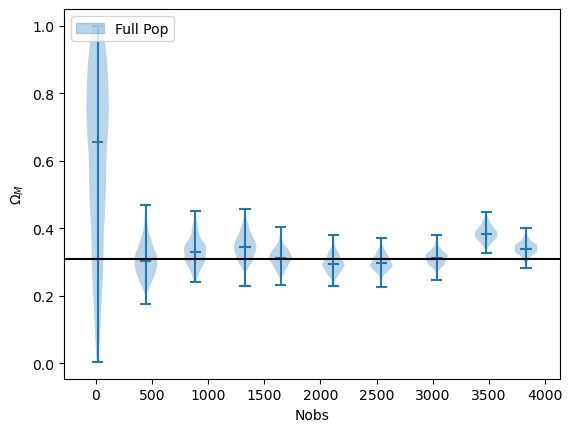

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))


positions = np.arange(3,13,3)
data = np.random.randn(1000, len(positions))
add_label(plt.violinplot(dataset=Om.T, positions=Nobs_plot, showmeans=False, showmedians=True,
               widths=200.0), "Full Pop")  


plt.axhline(Planck18.Om0, color='k', label='Planck18')

plt.legend(*zip(*labels), loc=2)
plt.xlabel('Nobs')
plt.ylabel(r'$\Omega_M$')

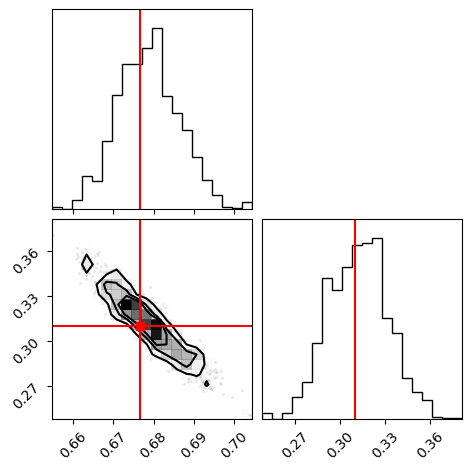

In [6]:
import corner
i = -3
h9 = h[i]
Om9 = Om[i]
figure = corner.corner(np.array([h9, Om9]).T)
true = np.array([Planck18.h,Planck18.Om0])
# Extract the axes
axes = np.array(figure.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="r")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="r")
        ax.axhline(true[yi], color="r")
        ax.plot(true[xi], true[yi], "sr")

In [7]:
np.std(h, axis=1)/np.median(h, axis=1)*100

array([11.221666 ,  2.939858 ,  2.1571093,  1.9295262,  1.5326188,
        1.4968235,  1.3164734,  1.1380023,  1.139721 ,  1.034895 ],
      dtype=float32)

In [8]:
Nobs_plot

array([  15.,  445.,  884., 1329., 1645., 2115., 2542., 3034., 3476.,
       3831.])

In [11]:
np.linspace(0.1, 30, 10)

array([ 0.1       ,  3.42222222,  6.74444444, 10.06666667, 13.38888889,
       16.71111111, 20.03333333, 23.35555556, 26.67777778, 30.        ])

In [9]:
z_plot = np.linspace(0.,3.,5000)
n = -3
h_plot = h[n]
Om_plot = Om[n]

Hz = np.zeros((h[-1].shape[0], z_plot.shape[0]))
for i in range(h[-1].shape[0]):
    Hz[i] = 100*h_plot[i]*(Om_plot[i]*(1+z_plot)**3+(1-Om_plot[i]))**0.5
Hz = Hz.T
#Hz.shape = (N_z_plot, Nsamples)
Hz.shape

(5000, 1000)

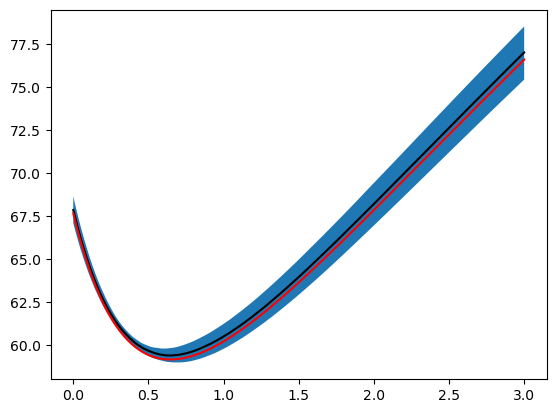

In [10]:
Hzd1pz = Hz/(1+z_plot[:,None])
Hzd1pzlq = np.quantile(Hzd1pz, 0.16, axis=1)
Hzd1pzhq = np.quantile(Hzd1pz, 0.84, axis=1)
Hzd1pzmed = np.median(Hzd1pz, axis=1)

plt.plot(z_plot, Hzd1pzmed, color='k', label='Median')
plt.plot(z_plot, 100*Planck18.h*(Planck18.Om0*(1+z_plot)**3+(1-Planck18.Om0))**0.5/(1+z_plot), color='r', label='Median')
plt.fill_between(z_plot, Hzd1pzlq, Hzd1pzhq)

In [19]:
n = 2
z_plot = 0.5
h_plot = h[n]
Om_plot = Om[n]

Hz = np.zeros((h[-1].shape[0]))
for i in range(h[-1].shape[0]):
    Hz[i] = 100*h_plot[i]*(Om_plot[i]*(1+z_plot)**3+(1-Om_plot[i]))**0.5
print("H(z=0.5) is constrained at=", np.std(Hz)/np.median(Hz)*100, "%")

H(z=0.5) is constrained at= 0.9809688401756932 %
